<a href="https://colab.research.google.com/github/TeddyProg/ML_workbooks/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libs, mounting drive

In [5]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


Loading data

In [16]:

data2023 = pd.read_csv('/content/drive/MyDrive/ZNO_data/Odata2023File.csv', on_bad_lines='warn', engine = 'c', header = 0, sep=';')


Index(['outid', 'Birth', 'SexTypeName', 'RegName', 'AreaName', 'TerName',
       'RegTypeName', 'TerTypeName', 'EOName', 'EOTypeName', 'EORegName',
       'EOAreaName', 'EOTerName', 'EOParent', 'Test', 'TestDate', 'UkrBlock',
       'UkrBlockStatus', 'UkrBlockBall100', 'UkrBlockBall', 'HistBlock',
       'HistBlockStatus', 'HistBlockBall100', 'HistBlockBall', 'MathBlock',
       'MathBlockStatus', 'MathBlockBall100', 'MathBlockBall', 'PhysBlock',
       'PhysBlockStatus', 'PhysBlockBall100', 'PhysBlockBall', 'ChemBlock',
       'ChemBlockStatus', 'ChemBlockBall100', 'ChemBlockBall', 'BioBlock',
       'BioBlockStatus', 'BioBlockBall100', 'BioBlockBall', 'EngBlock',
       'EngBlockStatus', 'EngBlockBall100', 'EngBlockBall', 'FraBlock',
       'FraBlockStatus', 'FraBlockBall100', 'FraBlockBall', 'DeuBlock',
       'DeuBlockStatus', 'DeuBlockBall100', 'DeuBlockBall', 'SpaBlock',
       'SpaBlockStatus', 'SpaBlockBall100', 'SpaBlockBall', 'PTRegName',
       'PTAreaName', 'PTTerName'],
  

Formatting dataframe

In [35]:
subjectGradesColumnNames = [ 'UkrBlockBall100',
                             'HistBlockBall100',
                             'MathBlockBall100',
                             'PhysBlockBall100',
                             'ChemBlockBall100',
                             'BioBlockBall100',
                             'EngBlockBall100',
                             'FraBlockBall100',
                             'DeuBlockBall100',
                             'SpaBlockBall100'
                             ]

for subjectGrade in subjectGradesColumnNames:
  data2023[subjectGrade] = data2023[subjectGrade].str.replace(',','.')
  data2023[subjectGrade] = data2023[subjectGrade].astype(np.float64)



<ipython-input-35-e13f55d0c311>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data2023[subjectGrade] = data2023[subjectGrade].astype(np.float)


3         140.0
4         134.0
5         160.0
7         143.0
9         124.0
          ...  
288928    149.0
288929    140.0
288930    155.0
288931    130.0
288933    134.0
Name: HistBlockBall100, Length: 141068, dtype: float64


Displaying different subjects histograms

(array([  224.,     0.,     0.,     0.,     0.,  4444., 57172., 67052.,
         8674.,  3502.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

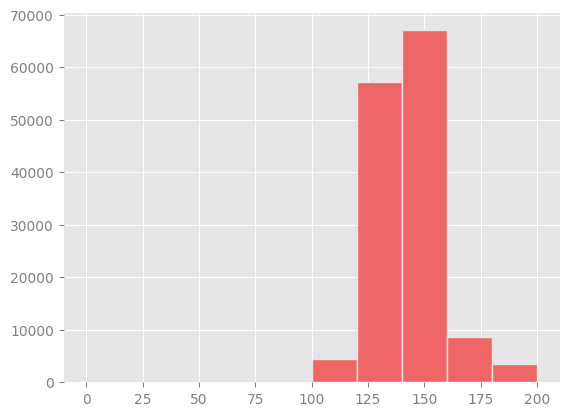

In [45]:
histGradesArray = data2023['HistBlockBall100'].dropna()
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)
# draw solid white grid lines
plt.grid(color='w', linestyle='solid')
# hide axis spines
for spine in ax.spines.values():
  spine.set_visible(False)
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
  tick.set_color('gray')
for tick in ax.get_yticklabels():
  tick.set_color('gray')

ax.hist(histGradesArray, bins = 10, edgecolor='#E6E6E6', color='#EE6666')
#print(hist, bin_edges)